In [721]:
import numpy as np

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [722]:
X, y = load_iris(return_X_y=True)

In [723]:
y = y.reshape((-1, 1))

In [724]:
y = y[:100]
X = X[:100, [0, 2]]

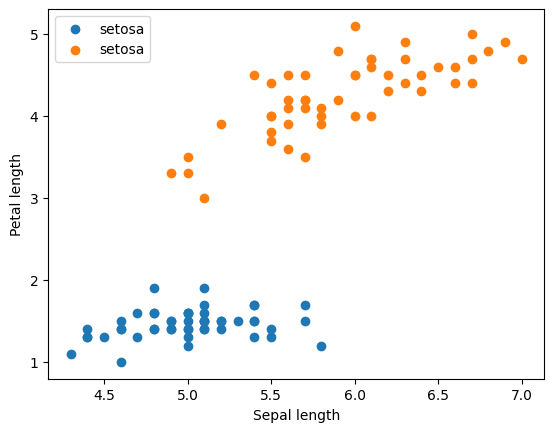

In [725]:
plt.scatter(X[:50, 0], X[:50, 1], label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], label="setosa")
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()

In [726]:
def initialize_params(n_in, n_out):
    W = np.random.rand(n_out, n_in) * 0.1
    b = np.zeros((n_out, 1))

    return W, b

In [727]:
def model(X, W, b): # Weighted Sum
    return W @ X.T + b

In [728]:
def loss(y_hat): # Activation Function (0 if x < 0 else 1)
    return np.where(y_hat >= 0.0, 1, 0)

In [729]:
def update_params(W, b, X, update):
    W += np.sum(update * X, axis=0)
    b += np.sum(update, axis=0)

    return W, b

In [730]:
def perceptron(X, y, lr, epochs):
    errors_list = []
    n_in, n_out = X.shape[1], y.shape[1]

    W, b = initialize_params(n_in, n_out)
    # initialize random params

    for i in range(epochs):
        y_hat = model(X, W, b)
        diff = y - loss(y_hat).T
        update = (diff) * lr
        W, b = update_params(W, b, X, update)

        errors = np.sum((diff.T != 0.0))
        errors_list.append(errors)
        print(f"{i} Epoch - {errors} Errors")
    
    return W, b, errors_list

In [731]:
W, b, errors_list = perceptron(X, y, lr=0.5, epochs=10)

0 Epoch - 50 Errors
1 Epoch - 50 Errors
2 Epoch - 50 Errors
3 Epoch - 50 Errors
4 Epoch - 50 Errors
5 Epoch - 46 Errors
6 Epoch - 50 Errors
7 Epoch - 0 Errors
8 Epoch - 0 Errors
9 Epoch - 0 Errors


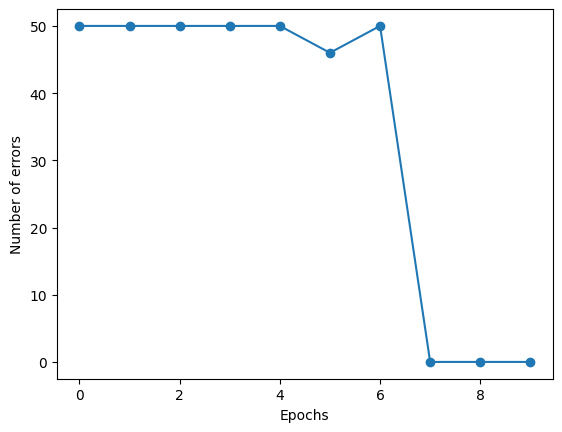

In [732]:
plt.plot(errors_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [733]:
# x2 = m * x1 + c
# x2 = -w1/w2 * x1 -b/w2

# m = -w1 / w2 - orientation
m = -W[0][0] / W[0][1]
# c = -b / w2 - intercept
c = -b[0] / W[0][1]

x1_min = X[:, 0].min() - 1
x1_max = X[:, 0].max() + 1
x1_range = np.linspace(x1_min, x1_max, 100)

x2_boundary = m * x1_range + c

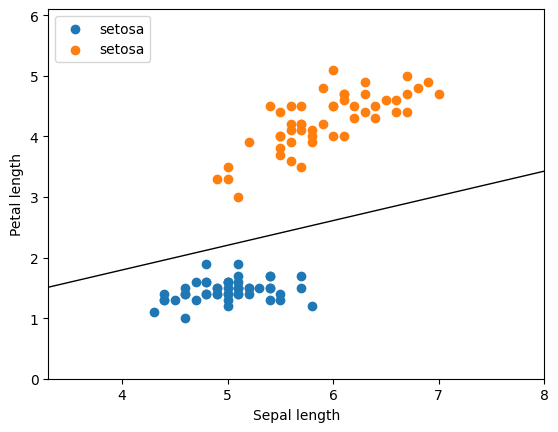

In [734]:
plt.scatter(X[:50, 0], X[:50, 1], label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], label="setosa")
plt.plot(x1_range, x2_boundary, 'k-', linewidth=1)
plt.legend(loc='upper left')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.xlim(x1_min, x1_max)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()